***
# `Project:` Prevendo a Ocorrências de Crises Epiléticas

## `Date:` dezembro, 2021

## `Data Scientist:` Walter Trevisan
***

## `Modelagem Preditiva` (*`Machine Learning`*) - `Versão 1`

Nesta etapa, vamos iniciar a etapa de **modelagem preditiva**, treinando e analisando alguns algoritmos de classificação. Para fazermos o treinamento dos modelos utilizaremos o *dataset* de treino (**`strat_train_set_v2.pck`**), e para avaliarmos a performance dos modelos utilizaremos o *dataset* de teste (**`strat_test_set.pck`**). Os dois *datasets* foram criados e preprados nas etapas anteriores.

Então, vamos realizar as seguintes atividades:

1. Carregar os *data frames* de treino (**`strat_train_set_v2.pck`**) e de teste (**`strat_test_set.pck`**);

2. Descrever as **métricas de classificação** que serão calculadas para avaliarmos os **modelos preditivos**;

3. Normalizar as **variáveis preditoras** nos dados de treino e nos dados de teste;

4. Balancear os dados de treino;

5. Criar os **modelos preditivos** (versão **`v1`**) utilizando os seguintes algoritmos de classificação:

> **`SGD`**: Stochastic Gradient Descent;
> **`KNN`**: K Nearest Neighbors;
> **`LR`**: Logistic Regression;
> **`DTC`**: Decision Tree Classifier;
> **`RFC`**: Random Forest Classifier;
> **`LDA`**: Linear Discriminant Analysis;
> **`NB`**: Naive bayes;
> **`XGBC`**: XGBoost Classifier.

6. Concluir esta etapa realizando as seguintes atividades:

>* salvar as **métricas de classificação (v1)** calculadas de cada modelo;
>* avaliar os resultados e escolher o **modelo preditivo** (**`v1`**) que apresentou a **melhor performance para solucionar o nosso problema de negócio**;
>* salvar o **modelo preditivo** (**`v1`**) escolhido.

## Setup:

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando os pacote NumPy:
import numpy as np
# Importando os pacote Pandas:
import pandas as pd

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Função para para normalizar as variáveis preditoras:
from sklearn.preprocessing import StandardScaler

# Funções para balanceamento dos dados:
import imblearn
from imblearn.over_sampling import SMOTE
# Função para criar amostras de dados de forma estratificada:
from sklearn.model_selection import StratifiedShuffleSplit
import collections
# Função de cálculo para plotar a "ROC Curve":
from sklearn.metrics import roc_curve

# Machine Learning imports
# Importando o pacote do Scikit-Learn:
import sklearn as skl 
# Importando algoritmos de classificação:
from sklearn.linear_model import SGDClassifier # Classificador SGD.
from sklearn.neighbors import KNeighborsClassifier # Classificador KNN.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier

# Definindo uma "semente" para reproduzir os mesmos dados nas tarefas de amostragem,
# balanceamento dos dados e treinamento dos modelos preditivos:
SEED = 42

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos Preditivos" (Machine Learning) relacionados ao Projeto:
ML_PATH = os.path.join(ROOT_DIR, "models")
# Criando o diretório, se ele não existir:
os.makedirs(ML_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "machine_learning_library.py":
import machine_learning_library as mllib

# Criando um objeto para calularmos os tempos gastos de treinamento:
ept = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))
print("Scikit-Learn: {}".format(skl.__version__))
print("Imb-Learn   : {}".format(imblearn.__version__))
print("xgboost     : {}".format(xgb.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.7.11
Numpy       : 1.21.2
Pandas      : 1.3.4
Matplotlib  : 3.5.0
Seaborn     : 0.11.2
Scikit-Learn: 1.0.1
Imb-Learn   : 0.8.1
xgboost     : 0.90


## 1- Carregar os *data frames* de treino e teste

### Preparando os dados de treino: `X_train` e `y_train`

In [3]:
# Carregando o "data frame" de treino ("strat_train_set_v2"):
train_df = dslib.pickle_object_load(
    path=DATA_PATH, file="strat_train_set_v2.pck",
    msg="O arquivo 'strat_train_set_v2.pck' (data frame) foi carregado com sucesso!"
)

O arquivo 'strat_train_set_v2.pck' (data frame) foi carregado com sucesso!


In [4]:
# Criando a matrizes "X_train" e o vetor "y_train":
# Criando uma lista com os nomes das variáveis preditoras:
features = list(train_df.columns.drop(labels=['y', 'target']))
# Criando a matriz "X_train":
X_train = train_df[features].values
# Criando o vetor "y_train":
y_train = train_df['target'].values
print("Dados de treino:")
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

Dados de treino:
X_train: (9200, 178)
y_train: (9200,)


### Preparando os dados de teste: `X_test` e `y_test`

In [5]:
# Carregando o "data frame" de teste ("strat_test_set"):
test_df = dslib.pickle_object_load(
    path=DATA_PATH, file="strat_test_set.pck",
    msg="O arquivo 'strat_test_set.pck' (data frame) foi carregado com sucesso!"
)

O arquivo 'strat_test_set.pck' (data frame) foi carregado com sucesso!


In [6]:
# Fazendo "feature engineering" nos dados de teste:
test_df = dslib.feature_engineering(df=test_df)

In [7]:
# Criando a matrizes "X_test" e o vetor "y_test":
# Criando uma lista com os nomes das variáveis preditoras:
features = list(test_df.columns.drop(labels=['y', 'target']))
# Criando a matriz "X_test":
X_test = test_df[features].values
# Criando o vetor "y_test":
y_test = test_df['target'].values
print("Dados de teste:")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

Dados de teste:
X_test: (2300, 178)
y_test: (2300,)


## 2- Descrição das `métricas de classificação`:

### Métricas: `Accuracy`, `Precision`, `Recall`, `f1-score` e `ROC Curve (AUC)`

### `Accuracy`:

A **acurácia** do modelo mede a taxa de acertos das classes ***True Positive*** e ***True Negative***, sendo calculada pela fórmula abaixo:

**`Accuracy = (TP + TN)/(TP + TN + FP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`TN`** é o número de ***verdadeiros negativos***;

3. **`FP`** é o número de ***falsos positivos***.

4. **`FN`** é o número de ***falsos negativos***.

Um classificador perfeito teria apenas *verdadeiros positivos* (**TP**) e *verdadeiros negativos* (**TN**), ou seja, sua **matriz de confusão** teria valores diferentes de zero somente na sua diagonal principal (superior esquerda para a inferior direita), ou seja, a sua acurácia (**`accuracy`**) seria de **100%**.

### `Precision`:

Uma outra métrica interessante a ser observada na ***matriz de confusão*** é a `acurácia das previsões positivas`; que é chamada de ***precisão (precision)*** do classificador e é calculada pela fórmula abaixo:

**`Precision = TP/(TP + FP)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FP`** é o número de ***falsos positivos***.

### `Recall`:

Entretanto, a precisão é utilizada em conjunto com outra métrica chamada ***revocação (recall)***, também conhecida como ***sensibilidade*** ou ***taxa de verdadeiros positivos (TPR)***: esta é a taxa de `instâncias positivas que são corretamente detectadas` pelo classificador, sendo calculada pela fórmula abaixo:

**`Recall = TP/(TP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***.

### `f1-score`:

Muitas vezes, é conveniente combinarmos **precisão** e **revocação** em uma única métrica chamada ***pontuação F1 (f1 score)***, principalmente se precisarmos comparar dois ou mais classificadores.

A ***pontuação F1*** é a ***média harmônica*** da **precisão** e **revocação**, sendo calculada pela fórmula abaixo:

**`F1 = TP/(TP + (FN + FP)/2)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***;

3. **`FP`** é o número de ***falsos positivos***.

Enquanto a média regular trata igualmente todos os valores, a média harmônica dá muito mais peso aos valores mais baixos, ou seja, o classificador só obterá uma ***pontuação F1*** alta, se a **revocação** e a **precisão** forem altas.

### `ROC Curve (AUC)`

A curva **ROC** (*características operacionais do receptor*) é outra ferramenta comum utilizada com classificadores binários. É muito semelhante à curva de **`precision/recall`**, mas, em vez de plotar a **precision versus recall**, a curva **ROC** plota a *taxa de verdadeiros positivos* (***TPR = True Positive Rate***), que é um outro nome dado para ***recall***, versus a *taxa de falsos positivos* (***FPR = False Positive Rate***). O ***FPR*** é a razão de instâncias negativas incorretamente classificadas como positivas. É igual a 1 menos *taxa de verdadeiros negativos* (***TNR = True Negative Rate***), que é a razão de instâncias negativas que são corretamente classificadas como negativas. A ***TNR*** também é chamada de ***especificidade***.

Portanto, a ***Curva ROC*** plota a ***`sensibilidade (recall)` versus `1 - especificidade`***.

Equações:

1. **`TPR = TP/(TP + FN)`** --> ***True Positive Rate***, ou também ***`recall`*** ou também ***`sensibilidade`***

2. **`FPR = FP/(FP + TN)`** --> ***False Positive Rate***

3. **`TNR = TN/(TN + FP)`** --> ***True Negative Rate***, ou também ***especificidade***

4. **`FPR = 1 - TNR`** ou também **`FPR = 1 - especificidade`**

Então, para plotarmos a ***ROC curve***, primeiro precisamos calcular a **TPR** e a **FPR** para vários valores de ***thresholds*** (limiares) utilizando a função ***`roc_curve()`***.

Mas, a função `roc_curve()` utiliza as **pontuações de decisão** (ao invés das previsões) de todas as instâncias do nosso dataset, ou seja, precisamos primeiro calcular estas pontuações (`scores`) de decisão utilizando o método `decision_function` da função `cross_val_predict()`.

Entretando, devido ao modo como funcionam, alguns classificadores (por exemplo: a classe `KNeighborsClassifier`) não possuem um método `decision_function()`. Em vez disso, eles possuem um método chamado `predict_proba()`. Este método retorna um array que contém uma linha por instância e uma coluna por classe, cada uma contendo a probabilidade de a instância dada pertencer à classe dada (por exemplo, neste projeto, 70% de chance de um cliente estar insatisfeito). Portanto, quando utilizarmos estes classificadores, primeiro precisaremos calcular as probabilidades com o método `predict_proba()`, e, então, em seguida calcularemos as *pontuações de decisão* utilizando a probabilidade da classe positiva como sendo a pontuação.

Observando o gráfico da **Curva ROC**, quanto maior a ***`TPR (recall)`***, mais falsos positivos (***`FPR`***) o classificador produz, ou seja, menor é a sua **precisão** (***`precision`***). A linha pontilhada representa a curva ROC de um classificador puramente aleatório; um bom classificador fica mais distante dessa linha possível (em direção ao canto superior esquerdo)!

Uma forma de compararmos dois ou mais classificadores é medirmos a **área abaixo da curva** (***`AUC = Area Under Curve`***). Um classificador perfeito terá um ***`ROC AUC = 1`***, enquanto que um classificador puramente aleatório terá um ***`ROC AUC = 0.5`***.

## 3- Normalizar as variáveis preditoras nos dados de treino e teste

Para normalizar as variáveis preditoras, ou seja, colocar os seus valores numéricos na mesma escala, utilizaremos a função **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**, que pertence ao pacote **`sklearn.preprocessing`**.

In [8]:
# Criando o objeto "scaler":
scaler = StandardScaler()

# Fit nos dados de treino:
scaler.fit(X_train)

# Salvando o objeto "scaler" na pasta "./objects":
dslib.pickle_object_save (
    path=OBJ_PATH, file="scaler_v1.pck", object_name=scaler,
    msg="O arquivo 'scaler_v1.pck' (object) foi salvo com sucesso!")

O arquivo 'scaler_v1.pck' (object) foi salvo com sucesso!


In [9]:
# Aplicando a normalização nos dados de treino:
X_train = scaler.transform(X=X_train)

# Aplicando a normalização nos dados de teste:
X_test = scaler.transform(X=X_test)

## 4- Balanceamento do *dataset* de treino utilizando a variável `target`

Na etapa de **análise exploratória** identificamos que o nosso *dataset* de treino possui apenas **`2%`** de observações classificadas com a categoria que representa a **ocorrência de convulsão** (**`target = 1`**), ou seja, temos um *dataset* **desbalanceado**. Neste caso, precisamos realizar um **balanceamento** do *dataset* de treino para evitarmos um *viés* no treinamento dos modelos de *machine learning*, ocasioando *overfitting*.

Utilizaremos a função **[SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)** do pacote **`imblearn.over_sampling`** para fazermos o balancemaneto dos dados de treino. Após o balanceamento a quantidade de registros para cada categoria será a mesma, ou seja, **50%** de registros para cada categoria.

In [10]:
# Balanceando os dados com a função "SMOTE":
# SMOTE é um metodo de oversampling. Ele cria exemplos sintéticos da classe minoritaria ao invés de criar cópias.

# Aplicando a função SMOTE:
X_train_bal, y_train_bal = SMOTE(random_state=SEED).fit_resample(X_train, y_train)

# # Verificando o "shape" do dataset de treino modificado:
print("X_train_bal (linhas, colunas): {}".format(X_train_bal.shape))
print("y_train_bal (linhas, colunas): {}".format(y_train_bal.shape))

X_train_bal (linhas, colunas): (14720, 178)
y_train_bal (linhas, colunas): (14720,)


In [11]:
# Utilizando a função "Counter" do pacote "collections" para contarmos as quantidades de classes da nossa variável target
# (target) após o balanceamento:
collections.Counter(y_train_bal)

Counter({1: 7360, 0: 7360})

In [12]:
# Verificando se existem "missing values" após o balanceamento:
if (not np.any(np.isnan(X_train_bal))):
    print("Não existem valores ausentes no dataset de treino balanceado!")

Não existem valores ausentes no dataset de treino balanceado!


**Análise:** portanto, temos o nosso *dataset* de *treino* **balanceado** e pronto para ser utilizado na **modelagem preditiva**.

## 5- Criação de modelos preditivos (`versão 1`)

Agora, vamos realizar a etapa de criação dos **modelos preditivos**, realizando o treinamento e validação de alguns algoritmos de ***machine learning***.

Nesta versão (**v1**), vamos treinar e validar os modelos utilizando as seguintes premissas:

* utilização de **todas** as variáveis preditoras (`X1, X2, ..., X178`);

* normalização das variáveis preditoras (`X1, X2, ..., X178`);

* balanceamento do *dataset* de treino, criando registros sintéticos da classe minoritária (`target = 1`).

Como equilibramos nossos dados de treinamento, através do **balanceamento**, vamos definir nosso limite em **0.5** para rotular uma amostra prevista como positiva. Portanto, as probabilidades previstas que foram acima deste valor (**THRESHOLD**) serão **rotuladas** como positiva (**`target = 1`**), ou seja, significa que os **pacientes terão crises epiléticas**.

In [13]:
# Definindo o valor limite (THRESHOLD):
THRESHOLD = 0.5

In [14]:
# Criando um dicionário dos modelos que serão treinados:
models = {
    'SGD' :SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3, random_state=SEED),
    'KNN' :KNeighborsClassifier(n_jobs=-1),
    'LR'  :LogisticRegression(random_state = SEED),
    'DTC' :DecisionTreeClassifier(random_state=SEED),
    'RFC' :RandomForestClassifier(random_state=SEED),
    'LDA' :LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'),
    'NB'  :GaussianNB(),
    'XGBC':XGBClassifier(random_state=SEED, n_jobs=-1)
}

## 5.1- [SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) (Stochastic Gradient Descent):

In [15]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'SGD'...")

# Treinando e avalidando o classificador binário com o SGD:
sgd, sgd_train_mtcs, sgd_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['SGD'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'SGD':")

Iniciando o treinamento/avaliação com o 'SGD'...

Training Metrics:
AUC      : 0.579
Accuracy : 0.5802
Precision: 0.5885
Recall   : 0.5329
f1-score : 0.5593

Validation Metrics:
AUC      : 0.5488
Accuracy : 0.6091
Precision: 0.2509
Recall   : 0.4804
f1-score : 0.3296

Tempo gasto para o treinamento/avaliação com o 'SGD': 0.89 seconds.


**Análise:**

1. com o classificador **`SGD`** obtivemos uma taxa de **acurácia** de **60.91%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`SGD`** apresentou uma performance **muito ruim**;

2. com o nosso classificador **`SGD`** obtivemos uma taxa de **precisão** de **25.09%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito ruim** porque em apenas **25%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`SGD`** obtivemos uma taxa de **revocação** de **48.04%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito ruim** porque em apenas **48%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`SGD`** obtivemos uma **`pontuação F1`** **muito baixa**, porque as taxas de **precisão** e **revocação** também foram muito baixas.

### `ROC Curve`

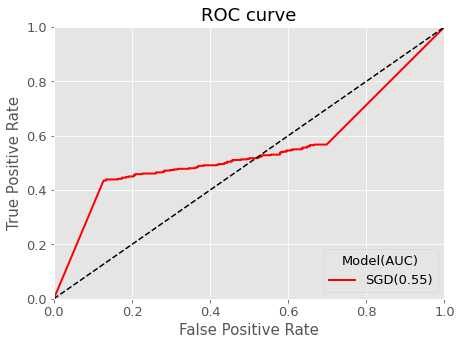

In [16]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = sgd.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=sgd_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='SGD', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`SGD`** apresentou uma ***`ROC curve`*** **muito distante** do *canto superior esquerdo*. Observe que a métrica **`AUC = 54.88%`** ficou **muito abaixo** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.2- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (K Nearest Neighbors):

In [17]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'KNN'...")

# Treinando e avalidando o classificador binário com o KNN:
knn, knn_train_mtcs, knn_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['KNN'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'KNN':")

Iniciando o treinamento/avaliação com o 'KNN'...

Training Metrics:
AUC      : 0.9999
Accuracy : 0.9969
Precision: 0.9963
Recall   : 0.9974
f1-score : 0.9969

Validation Metrics:
AUC      : 0.95
Accuracy : 0.9609
Precision: 0.9534
Recall   : 0.8457
f1-score : 0.8963

Tempo gasto para o treinamento/avaliação com o 'KNN': 8.26 seconds.


**Análise:**

1. com o classificador **`KNN`** obtivemos uma taxa de **acurácia** de **96.09%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`KNN`** apresentou uma performance **excelente**;

2. com o nosso classificador **`KNN`** obtivemos uma taxa de **precisão** de **95.34%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **excelente** porque em **95%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`KNN`** obtivemos uma taxa de **revocação** de **84.57%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito boa** porque em **85%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`KNN`** obtivemos uma **`pontuação F1`** **muito alta**, porque as taxas de **precisão** e **revocação** também foram muito altas.

### `ROC Curve`

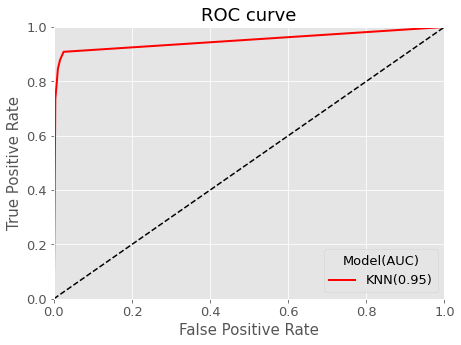

In [18]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = knn.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=knn_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='KNN', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`KNN`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 95%`** ficou **muito próxima** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.3- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

In [19]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'LR'...")

# Treinando e avalidando o classificador binário com o LR:
lr, lr_train_mtcs, lr_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['LR'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'LR':")

Iniciando o treinamento/avaliação com o 'LR'...

Training Metrics:
AUC      : 0.6364
Accuracy : 0.6523
Precision: 0.6941
Recall   : 0.5446
f1-score : 0.6103

Validation Metrics:
AUC      : 0.5367
Accuracy : 0.6909
Precision: 0.3118
Recall   : 0.4522
f1-score : 0.3691

Tempo gasto para o treinamento/avaliação com o 'LR': 0.42 seconds.


**Análise:**

1. com o classificador **`LR`** obtivemos uma taxa de **acurácia** de **69.09%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`LR`** apresentou uma performance **razoável**;

2. com o nosso classificador **`LR`** obtivemos uma taxa de **precisão** de **31.18%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito ruim** porque em apenas **31%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`LR`** obtivemos uma taxa de **revocação** de **45.22%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito ruim** porque em apenas **45%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`LR`** obtivemos uma **`pontuação F1`** **muito baixa**, porque as taxas de **precisão** e **revocação** também foram muito baixas.

### `ROC Curve`

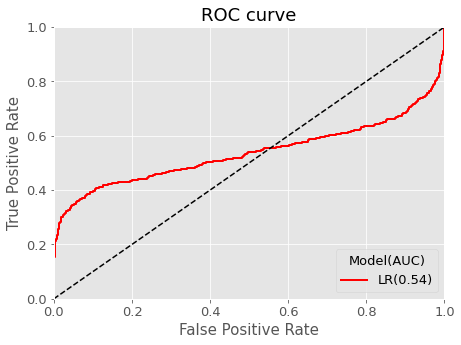

In [20]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = lr.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=lr_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='LR', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`LR`** apresentou uma ***`ROC curve`*** **muito distante** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 53.67%`** ficou **muito abaixo** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.4- [DTC](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (Decision Tree Classifier):

In [21]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'DTC'...")

# Treinando e avalidando o classificador binário com o DTC:
dtc, dtc_train_mtcs, dtc_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['DTC'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'DTC':")

Iniciando o treinamento/avaliação com o 'DTC'...

Training Metrics:
AUC      : 1.0
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
f1-score : 1.0

Validation Metrics:
AUC      : 0.888
Accuracy : 0.9043
Precision: 0.7174
Recall   : 0.8609
f1-score : 0.7826

Tempo gasto para o treinamento/avaliação com o 'DTC': 3.45 seconds.


**Análise:**

1. com o classificador **`DTC`** obtivemos uma taxa de **acurácia** de **90.43%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`DTC`** apresentou uma performance **muito boa**;

2. com o nosso classificador **`DTC`** obtivemos uma taxa de **precisão** de **71.74%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **boa** porque em **72%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`DTC`** obtivemos uma taxa de **revocação** de **86.09%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito boa** porque em **86%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`DTC`** obtivemos uma **`pontuação F1`** **alta**, porque as taxas de **precisão** e **revocação** também foram altas.

### `ROC Curve`

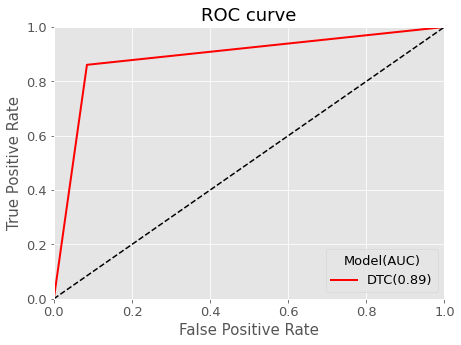

In [22]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = dtc.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=dtc_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='DTC', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`DTC`** apresentou uma ***`ROC curve`*** **próxima** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 88.80%`** ficou **próxima** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.5- [RFC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (Random Forest Classifier):

In [23]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'RFC'...")

# Treinando e avalidando o classificador binário com o RFC:
rfc, rfc_train_mtcs, rfc_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['RFC'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'RFC':")

Iniciando o treinamento/avaliação com o 'RFC'...

Training Metrics:
AUC      : 1.0
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
f1-score : 1.0

Validation Metrics:
AUC      : 0.9965
Accuracy : 0.9696
Precision: 0.8824
Recall   : 0.9783
f1-score : 0.9278

Tempo gasto para o treinamento/avaliação com o 'RFC': 16.11 seconds.


**Análise:**

1. com o classificador **`RFC`** obtivemos uma taxa de **acurácia** de **96.96%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`RFC`** apresentou uma performance **excelente**;

2. com o nosso classificador **`RFC`** obtivemos uma taxa de **precisão** de **88.24%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito boa** porque em **88%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`RFC`** obtivemos uma taxa de **revocação** de **97.83%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **excelente** porque em **98%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`RFC`** obtivemos uma **`pontuação F1`** **muito alta**, porque as taxas de **precisão** e **revocação** também foram muito altas.

### `ROC Curve`

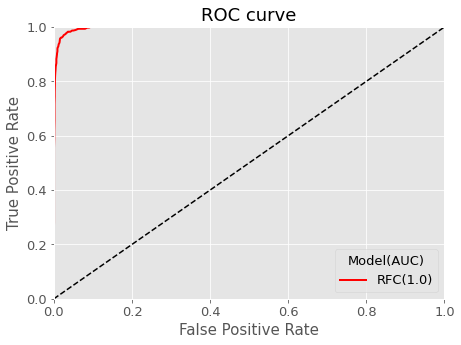

In [24]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = rfc.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=rfc_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='RFC', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`RFC`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 99.65%`** ficou **acima** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.6- [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) (Linear Discriminant Analysis):

In [25]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'LDA'...")

# Treinando e avalidando o classificador binário com o LDA:
lda, lda_train_mtcs, lda_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['LDA'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'LDA':")

Iniciando o treinamento/avaliação com o 'LDA'...

Training Metrics:
AUC      : 0.6087
Accuracy : 0.6504
Precision: 0.705
Recall   : 0.5173
f1-score : 0.5967

Validation Metrics:
AUC      : 0.5422
Accuracy : 0.7196
Precision: 0.3471
Recall   : 0.4565
f1-score : 0.3944

Tempo gasto para o treinamento/avaliação com o 'LDA': 0.47 seconds.


**Análise:**

1. com o classificador **`LDA`** obtivemos uma taxa de **acurácia** de **71.96%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`LDA`** apresentou uma performance **boa**;

2. com o nosso classificador **`LDA`** obtivemos uma taxa de **precisão** de **34.71%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito ruim** porque em apenas **35%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`LDA`** obtivemos uma taxa de **revocação** de **45.65%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito ruim** porque em apenas **46%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`LDA`** obtivemos uma **`pontuação F1`** **muito baixa**, porque as taxas de **precisão** e **revocação** também foram muito baixas.

### `ROC Curve`

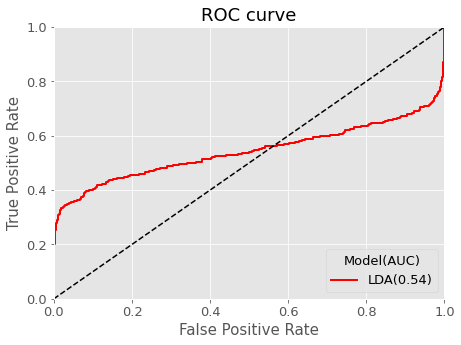

In [26]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = lda.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=lda_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='LDA', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`LDA`** apresentou uma ***`ROC curve`*** **muito distante** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 54.22%`** ficou **muito abaixo** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.7- [NB](https://scikit-learn.org/0.15/modules/generated/sklearn.naive_bayes.GaussianNB.html) (Naive Bayes):

In [27]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'NB'...")

# Treinando e avalidando o classificador binário com o NB:
nb, nb_train_mtcs, nb_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['NB'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'NB':")

Iniciando o treinamento/avaliação com o 'NB'...

Training Metrics:
AUC      : 0.9747
Accuracy : 0.896
Precision: 0.9646
Recall   : 0.8221
f1-score : 0.8877

Validation Metrics:
AUC      : 0.982
Accuracy : 0.9587
Precision: 0.8747
Recall   : 0.9261
f1-score : 0.8997

Tempo gasto para o treinamento/avaliação com o 'NB': 0.10 seconds.


**Análise:**

1. com o classificador **`NB`** obtivemos uma taxa de **acurácia** de **95.87%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`NB`** apresentou uma performance **excelente**;

2. com o nosso classificador **`NB`** obtivemos uma taxa de **precisão** de **87.47%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito boa** porque em **87%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`NB`** obtivemos uma taxa de **revocação** de **92.61%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **excelente** porque em **93%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`NB`** obtivemos uma **`pontuação F1`** **muito alta**, porque as taxas de **precisão** e **revocação** também foram muito altas.

### `ROC Curve`

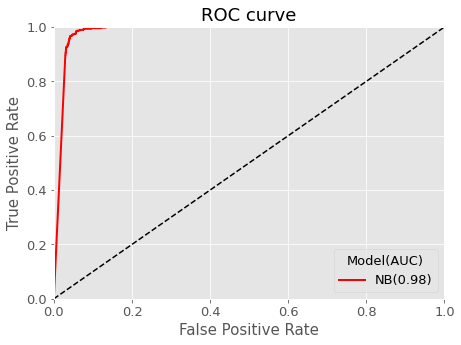

In [28]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = nb.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=nb_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='NB', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`NB`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 98.20%`** ficou **muito próxima** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 5.8- [XGBC](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) (XGBoost Classifier):

In [29]:
# Inicia o treinamento e avaliação:
ept.start(msg="Iniciando o treinamento/avaliação com o 'XGBC'...")

# Treinando e avalidando o classificador binário com o XGBC:
xgbc, xgbc_train_mtcs, xgbc_test_mtcs = mllib.train_validate_binary_clf_model(
    classifier=models['XGBC'], X_train=X_train_bal, y_train=y_train_bal, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD
)

# Fim do treinamento e avaliação:
ept.end(msg="\nTempo gasto para o treinamento/avaliação com o 'XGBC':")

Iniciando o treinamento/avaliação com o 'XGBC'...

Training Metrics:
AUC      : 0.9961
Accuracy : 0.9678
Precision: 0.9749
Recall   : 0.9603
f1-score : 0.9676

Validation Metrics:
AUC      : 0.9933
Accuracy : 0.9552
Precision: 0.8439
Recall   : 0.9522
f1-score : 0.8948

Tempo gasto para o treinamento/avaliação com o 'XGBC': 3.68 seconds.


**Análise:**

1. com o classificador **`XGBC`** obtivemos uma taxa de **acurácia** de **95.52%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética** e que **não terão uma crise epilética**. Portanto, o nosso classificador **`XGBC`** apresentou uma performance **excelente**;

2. com o nosso classificador **`XGBC`** obtivemos uma taxa de **precisão** de **84.39%** nos dados de teste, ou seja, é a porcentagem de pacientes, classificados corretamente por ele, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **muito boa** porque em **84%** dos pacientes ele acertou que os mesmos **terão uma crise epilética**;

3. com o nosso classificador **`XGBC`** obtivemos uma taxa de **revocação** de **95.22%** nos dados de teste, ou seja, é a porcentagem de pacientes, que ele conseguiu detectar, que **terão uma crise epilética**. Portanto, o nosso modelo apresentou uma performance **excelente** porque em **95%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**;

4. com o classificador **`XGBC`** obtivemos uma **`pontuação F1`** **muito alta**, porque as taxas de **precisão** e **revocação** também foram muito altas.

### `ROC Curve`

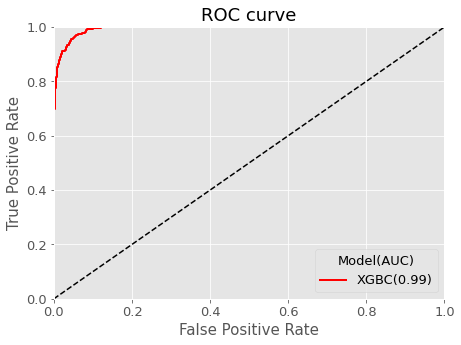

In [30]:
# Dados de teste: obtendo as probabilidades da classe positiva (1):
y_test_preds = xgbc.predict_proba(X_test)[:,1]

# Calculando o "FPR", "TPR" e "Thresholds":
fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)

# Plot da "Curva ROC":
ptlib.plot_roc_curve(
    fpr, tpr, auc=xgbc_test_mtcs['auc'], auc_decimals=2, plot_style='ggplot', color='red', line_width=2,
    title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
    legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='XGBC', legend_fontsize=13,
    width=7, height=5, figure_id=None, figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:**

Podemos observar que o nosso classificador **`XGBC`** apresentou uma ***`ROC curve`*** **muito próxima** do *canto superior esquerdo*. Observe também que a métrica **`AUC = 99.33%`** ficou **acima** do valor proposto de avaliação do projeto (**`AUC = ~99%`**).

## 6- Conclusão

### Salvando as métricas de classificação (`v1`):

In [31]:
# Criando um data frame para armazenar as métricas:
clf_metrics_v1 = pd.DataFrame(
    {'model':['SGD','SGD','KNN','KNN','LR','LR','DTC','DTC','RFC','RFC','LDA','LDA','NB','NB','XGBC','XGBC'],
     'data set':['train','test']*8,
     'auc':[sgd_train_mtcs['auc'],sgd_test_mtcs['auc'],knn_train_mtcs['auc'],knn_test_mtcs['auc'],lr_train_mtcs['auc'],lr_test_mtcs['auc'],dtc_train_mtcs['auc'],dtc_test_mtcs['auc'],rfc_train_mtcs['auc'],rfc_test_mtcs['auc'],lda_train_mtcs['auc'],lda_test_mtcs['auc'],nb_train_mtcs['auc'],nb_test_mtcs['auc'],xgbc_train_mtcs['auc'],xgbc_test_mtcs['auc']],
     'accuracy':[sgd_train_mtcs['accuracy'],sgd_test_mtcs['accuracy'],knn_train_mtcs['accuracy'],knn_test_mtcs['accuracy'],lr_train_mtcs['accuracy'],lr_test_mtcs['accuracy'],dtc_train_mtcs['accuracy'],dtc_test_mtcs['accuracy'],rfc_train_mtcs['accuracy'],rfc_test_mtcs['accuracy'],lda_train_mtcs['accuracy'],lda_test_mtcs['accuracy'],nb_train_mtcs['accuracy'],nb_test_mtcs['accuracy'],xgbc_train_mtcs['accuracy'],xgbc_test_mtcs['accuracy']],
     'precision':[sgd_train_mtcs['precision'],sgd_test_mtcs['precision'],knn_train_mtcs['precision'],knn_test_mtcs['precision'],lr_train_mtcs['precision'],lr_test_mtcs['precision'],dtc_train_mtcs['precision'],dtc_test_mtcs['precision'],rfc_train_mtcs['precision'],rfc_test_mtcs['precision'],lda_train_mtcs['precision'],lda_test_mtcs['precision'],nb_train_mtcs['precision'],nb_test_mtcs['precision'],xgbc_train_mtcs['precision'],xgbc_test_mtcs['precision']],
     'recall':[sgd_train_mtcs['recall'],sgd_test_mtcs['recall'],knn_train_mtcs['recall'],knn_test_mtcs['recall'],lr_train_mtcs['recall'],lr_test_mtcs['recall'],dtc_train_mtcs['recall'],dtc_test_mtcs['recall'],rfc_train_mtcs['recall'],rfc_test_mtcs['recall'],lda_train_mtcs['recall'],lda_test_mtcs['recall'],nb_train_mtcs['recall'],nb_test_mtcs['recall'],xgbc_train_mtcs['recall'],xgbc_test_mtcs['recall']],
     'f1-score':[sgd_train_mtcs['f1_score'],sgd_test_mtcs['f1_score'],knn_train_mtcs['f1_score'],knn_test_mtcs['f1_score'],lr_train_mtcs['f1_score'],lr_test_mtcs['f1_score'],dtc_train_mtcs['f1_score'],dtc_test_mtcs['f1_score'],rfc_train_mtcs['f1_score'],rfc_test_mtcs['f1_score'],lda_train_mtcs['f1_score'],lda_test_mtcs['f1_score'],nb_train_mtcs['f1_score'],nb_test_mtcs['f1_score'],xgbc_train_mtcs['f1_score'],xgbc_test_mtcs['f1_score']]
    }
)

# Salvando as métricas (objeto "clf_metrics_df") na pasta "./objects":
dslib.pickle_object_save (
    path=OBJ_PATH, file="clf_metrics_v1.pck", object_name=clf_metrics_v1,
    msg="O arquivo 'clf_metrics_v1.pck' (object) foi salvo com sucesso!"
)

O arquivo 'clf_metrics_v1.pck' (object) foi salvo com sucesso!


### Avaliando a métrica `AUC` nos *datasets* de treino e de teste:

Primeiro, vamos plotar um gráfico de barras para avaliarmos o desempenho de cada modelo em relação aos dados de treino e de teste.

Saving figure: plot_auc_train_vs_test_v1


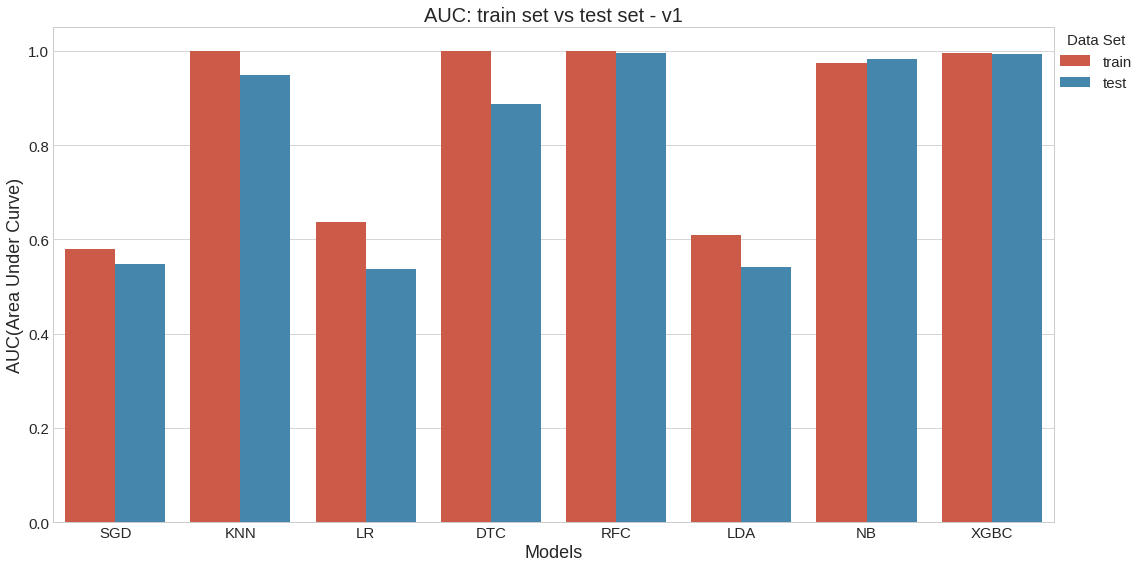

In [32]:
# Comparando a métrica "AUC" dos modelos nos dados de treino e teste:
ptlib.plot_ml_metrics(
    data=clf_metrics_v1, x='model', y='auc', hue='data set', plot_style='seaborn-whitegrid', title="AUC: train set vs test set - v1",
    title_fontsize=20, xlabel="Models", xlabel_fontsize=18, ylabel="AUC(Area Under Curve)", ylabel_fontsize=18,
    ticks_fontsize=15, legendtitle="Data Set", legendtitle_fontsize=15, legend_label=None, legend_fontsize=15,
    legend_loc=2, legend_borderaxespad=0., legend_bbox_to_anchor=(1, 1), width=16, height=8,
    figure_id='plot_auc_train_vs_test_v1', figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:** podemos observar que os modelos que apresentaram um desempenho melhor, nos dados de treino e teste, foram: **`KNN`**, **`RFC`**, **`NB`** e **`XGBC`**.

Agora, vamos avaliar os resultados das métricas **`AUC`** e **`Recall`** considerando apenas os dados de teste.

### Avaliando as métricas `AUC` e `Recall` nos dados de teste:

Agora, vamos plotar um gráfico comparando as métricas **`AUC`** e as métricas de revocação (**`Recall`**), de cada modelo, e então vamos definir qual dos modelos atende as necessidades do projeto para resolver o problema de negócio para o qual ele foi criado:

### `AUC`

Saving figure: plot_models_vs_auc_v1


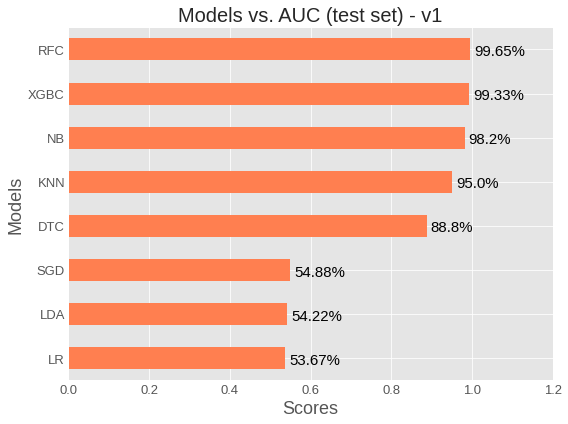

In [33]:
# Criando um objeto (Serie) com os valores da métrica "AUC" classificados em ordem descrescente:
# Criando um índice para selecionarmos apenas as linhas referente aos dados de teste:
index = clf_metrics_v1['data set'] == 'test'
# Classificando as taxas de "AUC":
models_auc = clf_metrics_v1.loc[index, ['model','auc']].set_index(keys='model')['auc'].sort_values(ascending=False)

# Plot: models vs AUC
ptlib.plot_models_vs_scores(
    scores=models_auc, plot_style='ggplot', bar_color='coral', alpha=0.8,
    score_color='black', score_fontsize=15, title="Models vs. AUC (test set) - v1",
    title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
    ylabel_fontsize=18, ticks_fontsize=13, width=8, height=6,
    figure_id='plot_models_vs_auc_v1', figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

### `Recall`

Saving figure: plot_models_vs_recall_v1


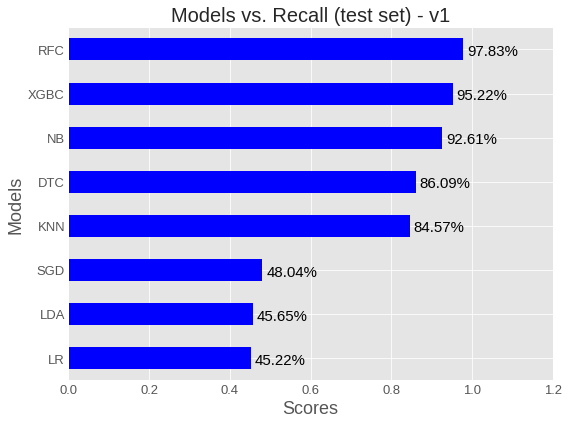

In [34]:
# Criando um objeto (Serie) com os valores da métrica "Recall" classificados em ordem descrescente:
# Criando um índice para selecionarmos apenas as linhas referente aos dados de teste:
index = clf_metrics_v1['data set'] == 'test'
# Classificando as taxas de "Recall":
models_recall = clf_metrics_v1.loc[index, ['model','recall']].set_index(keys='model')['recall'].sort_values(ascending=False)

# Plot: models vs AUC
ptlib.plot_models_vs_scores(
    scores=models_recall, plot_style='ggplot', bar_color='blue', alpha=0.8,
    score_color='black', score_fontsize=15, title="Models vs. Recall (test set) - v1",
    title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
    ylabel_fontsize=18, ticks_fontsize=13, width=8, height=6,
    figure_id='plot_models_vs_recall_v1', figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:** de acordo com as métricas **`AUC`**, para a versão **`v1`** dos modelos preditivos, dois modelos tiveram um desempenho satisfatório e podem ser utilizados para solucionar o problema de negócio, ou seja, **prever se o paciente terá uma crise epilética**. São eles:

1. **`RFC`**: **AUC = 99.65%**;

2. **`XGBC`**: **AUC = 99.33%**.

Os dois modelos previtivos conseguiram obter na versão **v1**, na métrica **AUC**, o valor mínimo desejado para o projeto que é de **99%**.

Entretanto, vamos escolher o modelo **`RFC`** (***Random Forest Classifier***) porque ele apresentou a melhor performance na métrica de revocação (**`Recall`**) entre os modelos, ou seja, em **~98%** dos pacientes ele conseguiu detectar que os mesmos **terão uma crise epilética**.

Portanto, para a versão **`v1`** dos modelos preditivos a minha escolha é o modelo criado com o algoritmo **`RFC`** (***Random Forest Classifier***).

### Salvando o modelo preditivo (**`v1`**) escolhido:

In [35]:
# Salvando o modelo preditivo "rfc" (Random Forest Classifier):
dslib.pickle_object_save (
    path=ML_PATH, file="rfc_best_model_v1.pck", object_name=rfc,
    msg="O arquivo 'rfc_best_model_v1.pck' (modelo preditivo) foi salvo com sucesso!"
)

O arquivo 'rfc_best_model_v1.pck' (modelo preditivo) foi salvo com sucesso!


## <font color='black'>FIM</font>